In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO THINKPAD 13\Downloads\MLR\ToyotaCorolla - MLR.csv")

# Display first few rows
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [2]:
# Summary statistics
df.describe()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [3]:

df.isnull().sum()


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

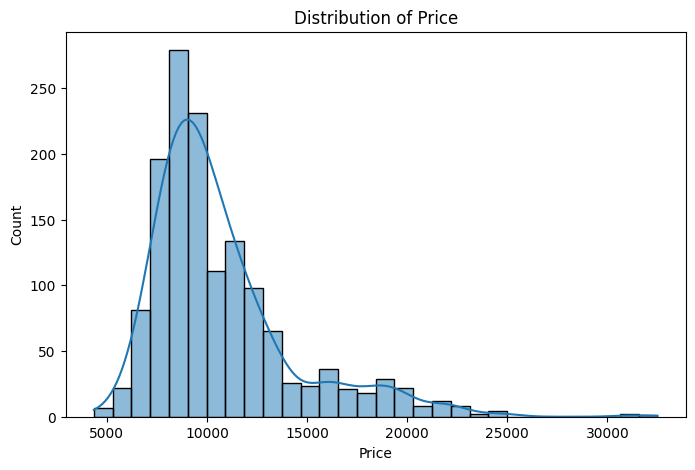

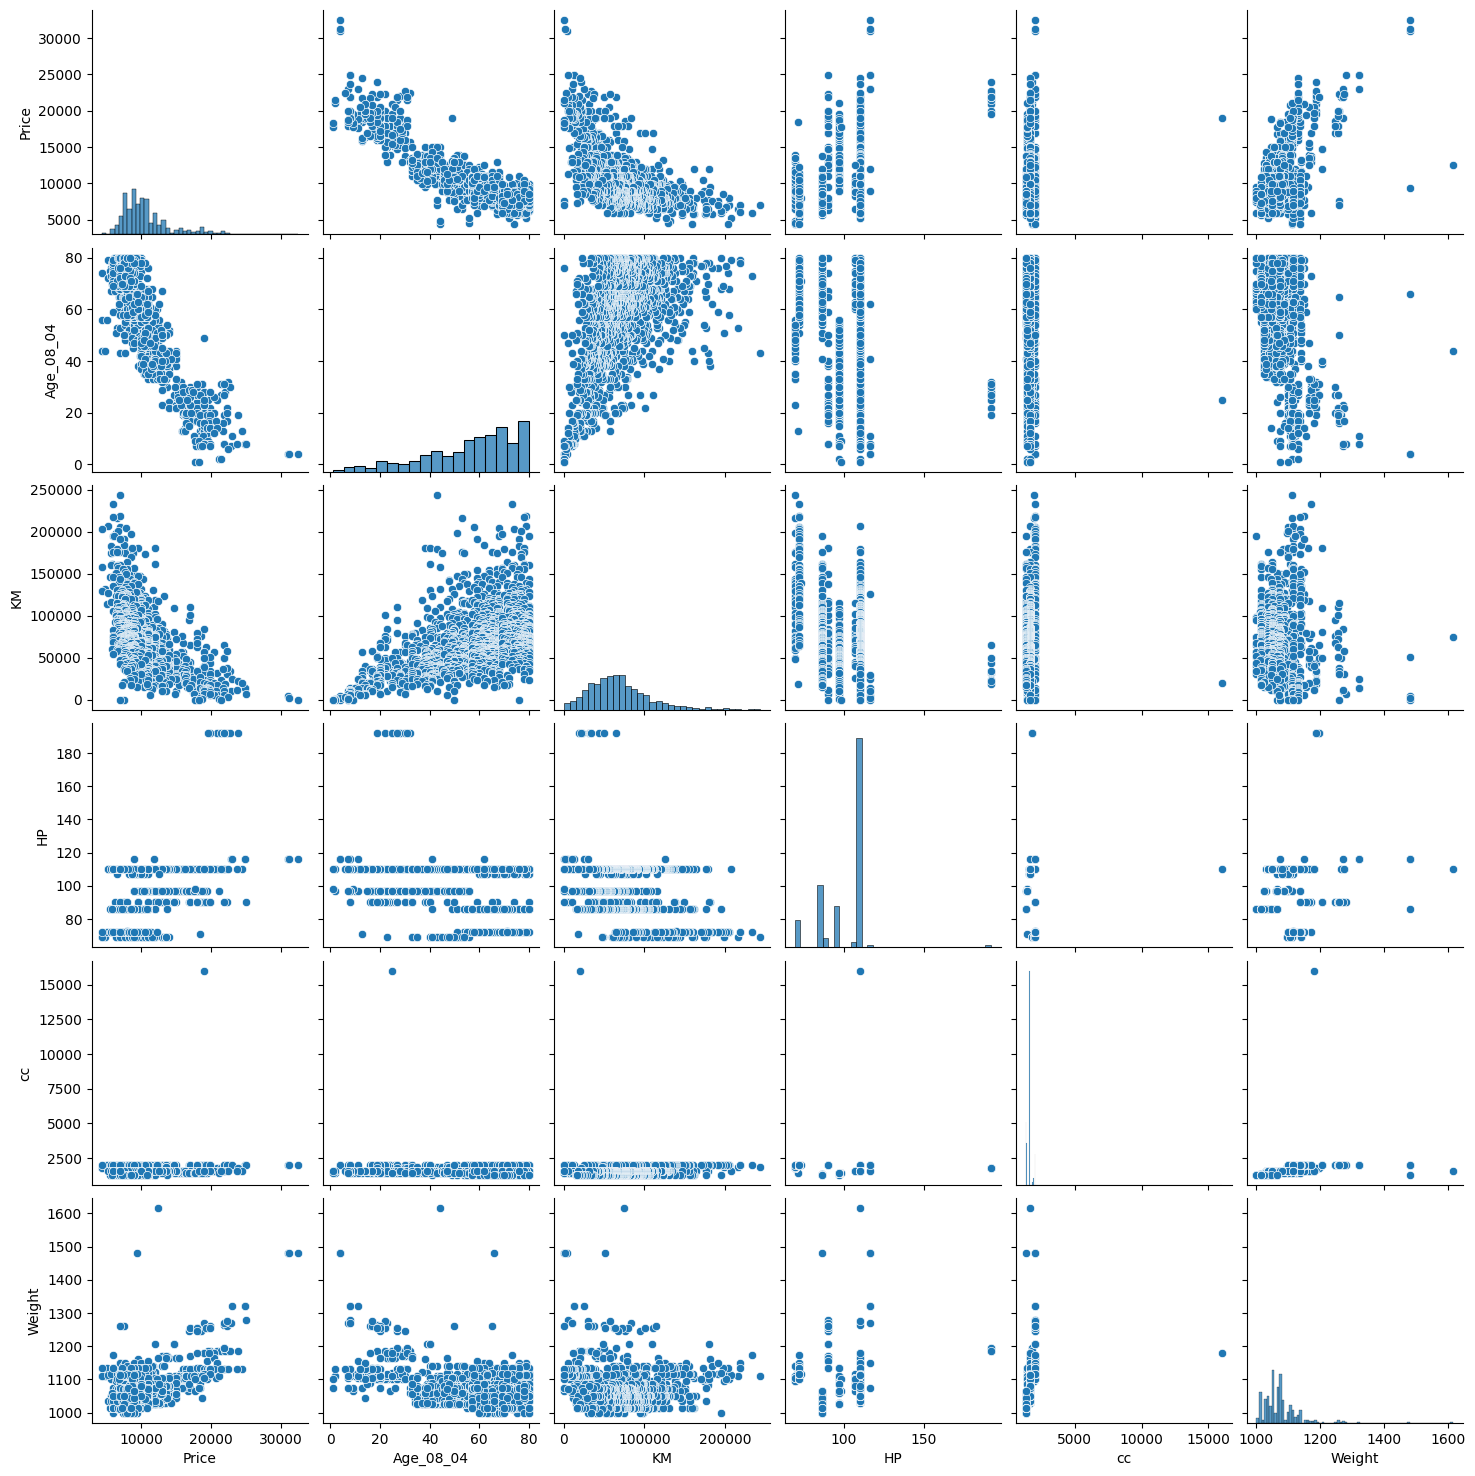

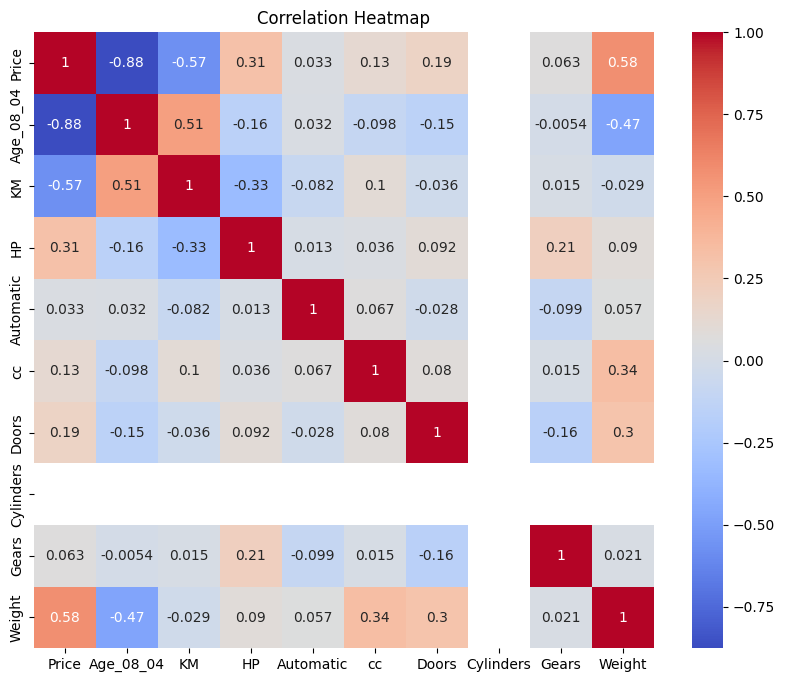

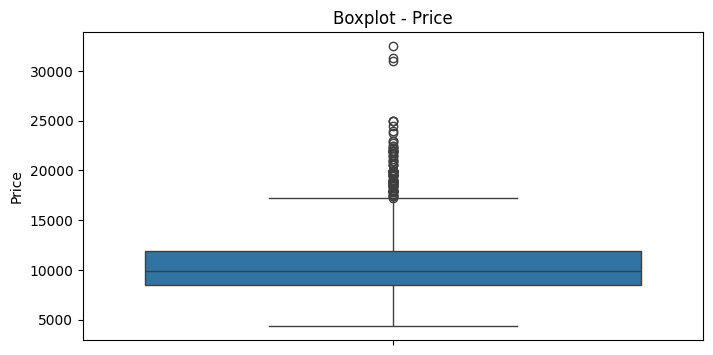

In [15]:
# Distribution of target variable (Price)
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()

import numpy as np

# Keep only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# 1. Pairplot
sns.pairplot(numeric_df[['Price','Age_08_04','KM','HP','cc','Weight']])
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Boxplot to detect outliers in Price
plt.figure(figsize=(8, 4))
sns.boxplot(df['Price'])
plt.title("Boxplot - Price")
plt.show()


In [14]:
# Features and target
X = df[['Age_08_04','KM','Fuel_Type','HP','Automatic','cc','Doors','Weight']]
y = df['Price']

# Column transformer for preprocessing
numeric_features = ['Age_08_04','KM','HP','cc','Doors','Weight']
categorical_features = ['Fuel_Type','Automatic']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])


In [13]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Linear Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model
lr_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = lr_pipeline.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print("RMSE:", rmse)
print("R2 Score:", r2)


Linear Regression Performance:
RMSE: 1491.4107550884648
R2 Score: 0.8332952678447363


In [12]:
 #create additional features like Age*KM or HP*Weight
X_train['Age_KM'] = X_train['Age_08_04'] * X_train['KM']
X_test['Age_KM'] = X_test['Age_08_04'] * X_test['KM']

# Fit model again
lr_pipeline.fit(X_train, y_train)
y_pred2 = lr_pipeline.predict(X_test)

# Evaluation
print("Linear Regression with Interaction Feature Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred2)))
print("R2 Score:", r2_score(y_test, y_pred2))


Linear Regression with Interaction Feature Performance:
RMSE: 1491.4107550884648
R2 Score: 0.8332952678447363


In [10]:
# Lasso Regression
lasso_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso R2:", r2_score(y_test, y_pred_lasso))

# Ridge Regression
ridge_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', Ridge(alpha=1))
])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge R2:", r2_score(y_test, y_pred_ridge))


Lasso RMSE: 1491.2999850316244
Lasso R2: 0.833320029912254
Ridge RMSE: 1489.6989744882967
Ridge R2: 0.833677722057408


In [11]:
# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()
coefficients = lr_pipeline.named_steps['regressor'].coef_

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
7,cat__Fuel_Type_Petrol,1453.694461
5,num__Weight,1326.190352
2,num__HP,234.138332
8,cat__Automatic_1,93.081993
6,cat__Fuel_Type_Diesel,4.202110
3,num__cc,-14.098311
4,num__Doors,-80.500836
1,num__KM,-600.179991
0,num__Age_08_04,-2267.156303


Step 7: Interview Questions

Q1: Normalization vs Standardization

Normalization: Scales values between 0 and 1 (min-max scaling). Useful for distance-based algorithms (KNN, SVM).

Standardization: Centers data around 0 with unit variance. Useful for regression, PCA, regularization.

Q2: Techniques to Address Multicollinearity

Check correlation matrix and VIF (Variance Inflation Factor).

Remove highly correlated features.

Use regularization: Lasso (feature selection) or Ridge (shrink coefficients).

Apply PCA or dimensionality reduction.